### Import required packages

In [1]:
import pandas as pd
import os
import opendatasets as od
import librosa as li
import matplotlib.pyplot as plt

### Import and Explore Dataset
Currently using the [British Birdsong Dataset](https://www.kaggle.com/datasets/rtatman/british-birdsong-dataset?resource=download).

In [2]:
dataset_url = 'https://www.kaggle.com/datasets/rtatman/british-birdsong-dataset?resource=download'
path_to_download = '../datasets'

od.download(dataset_url, data_dir=path_to_download)

Skipping, found downloaded files in "../datasets\british-birdsong-dataset" (use force=True to force download)


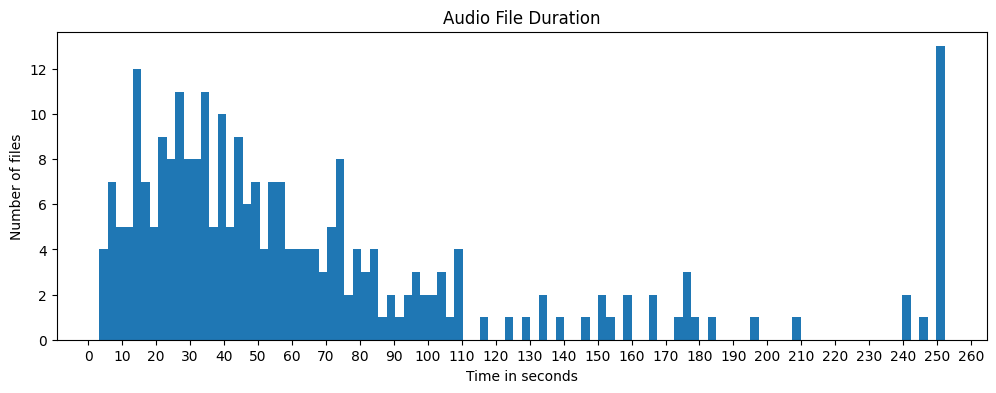

In [4]:
# Load all files and make a list of all durations
sound_files_path = path_to_download + '/british-birdsong-dataset/songs/songs/'

duration_list = []

for filename in os.listdir(sound_files_path):
  y, sr = li.load(sound_files_path + filename)
  
  duration_list.append(
    li.get_duration(y=y, sr=sr)
  )
  
# Plot histogram of audio file durations
plt.subplots(figsize=(12,4))
plt.title('Audio File Duration')
plt.xlabel('Time in seconds')
plt.ylabel('Number of files')
plt.xticks(range(0, 300, 10))
plt.hist(duration_list, bins=100)
plt.show()

In [3]:
csv_path = path_to_download + '/british-birdsong-dataset/birdsong_metadata.csv'
df = pd.read_csv(csv_path)

In [4]:
species_count = df[['english_cname', 'file_id']].groupby('english_cname').count().rename(columns={'file_id':'count'})

species_count

,count
english_cname,
Common Redpoll,3
Marsh Warbler,3


In [23]:
csv_path = path_to_download + '/british-birdsong-dataset/birdsong_metadata.csv'
sound_files_path = path_to_download + '/british-birdsong-dataset/songs/songs/'

metadata = pd.read_csv(csv_path)[['file_id', 'english_cname']]

audio_data = []
labels = []

SAMPLE_RATE = 44100
LENGTH_SECONDS = 10

for i in metadata.itertuples():
  filename = sound_files_path + 'xc' + str(i[1]) + '.flac'
  
  # Read file and get duration
  y, sr = li.load(filename, sr=None)
  duration = li.get_duration(y=y, sr=sr)
  
  # If longer than target duration, split it in segments and append it
  if duration > LENGTH_SECONDS:
    for i in range(int(duration / LENGTH_SECONDS) + 1):
      sample = y[i * sr * LENGTH_SECONDS : (i + 1) * sr * LENGTH_SECONDS]
      audio_data.append(sample)
      labels.append(i[2])
  
  else:  
    audio_data.append(y)
    labels.append(i[2])
  
  if sr != SAMPLE_RATE:
    print(f'WARNING: Sample rate mismatch for xc{str(i[1])}.flac')
  

38.55673469387755
1700352.0
12.695510204081632
559872.0
5.067755102040817
shorter
16.22204081632653
715392.0
12.93061224489796
570240.0
17.580408163265307
775296.0
